In [1]:
import pandas as pd
import matplotlib as mplstyle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [112]:
schools = pd.read_csv('FL_elementaries.csv')

In [113]:
schools['FF_school_flag'].describe()

count      1804
unique        2
top       False
freq       1799
Name: FF_school_flag, dtype: object

In [114]:
pinellas_palette = ["#3498db", "#e74c3c"]
race_palette = ["#1b9e77", "#d95f02"]

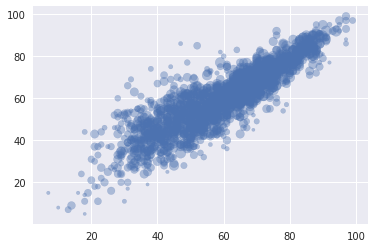

In [115]:
g  = plt.scatter(\
            x=schools['percent_passing_reading'], 
            y=schools['percent_passing_math'], 
            #size
                 s=schools['total_enrollment']/10, 
            #opacity
                 alpha=0.4)

#need to manipulate size of the figure (forgot how to do this)

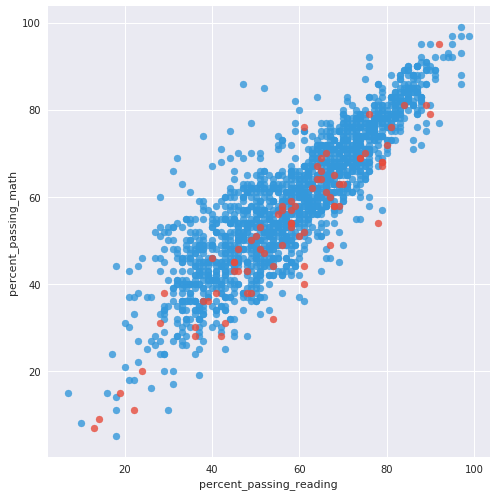

In [116]:
#highlight five with facetgrid
g = sns.FacetGrid(schools,
                  hue='pinellas_flag', 
                  palette=pinellas_palette,
                 size=7)
g.map(plt.scatter, "percent_passing_reading", "percent_passing_math", 
      alpha=.8)

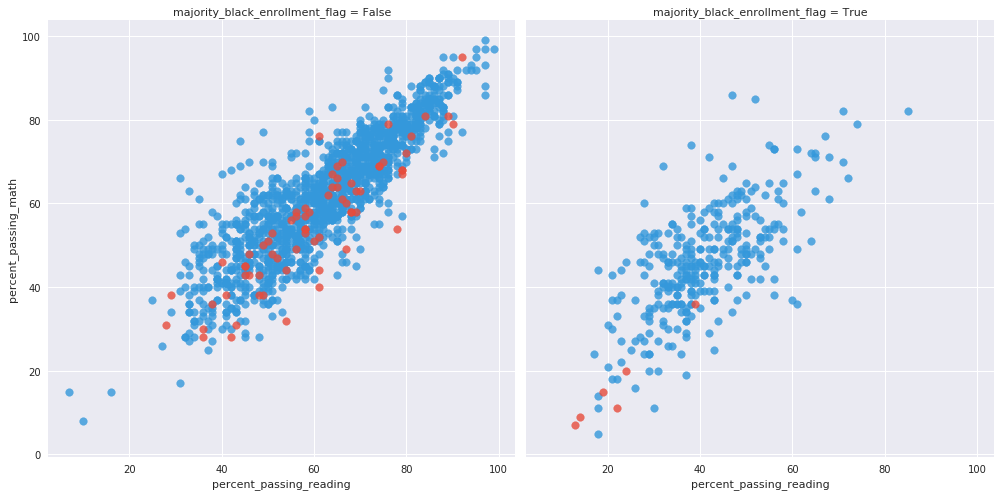

In [117]:
g = sns.FacetGrid(schools,
                  hue='pinellas_flag', 
                  col='majority_black_enrollment_flag',
                  palette=pinellas_palette,
                  size=7)
g.map(plt.scatter, "percent_passing_reading", "percent_passing_math", 
      alpha=.8, 
      s=60)

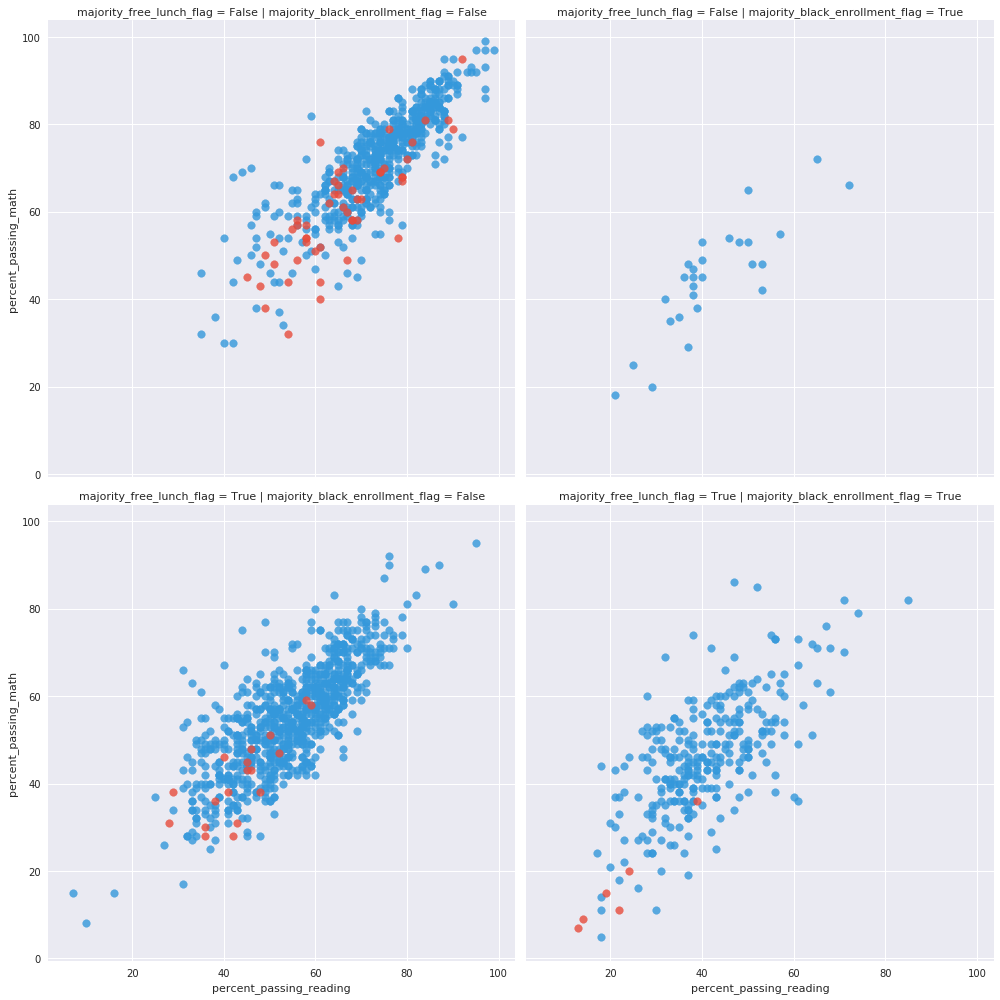

In [118]:
g = sns.FacetGrid(schools,
                  hue='pinellas_flag', 
                  col='majority_black_enrollment_flag',
                  row='majority_free_lunch_flag',
                  palette=pinellas_palette,
                  size=7)
g.map(plt.scatter, "percent_passing_reading", "percent_passing_math", 
      alpha=.8, 
      s=60)

In [119]:
#facet grids can facet on variables
#row, col, hue

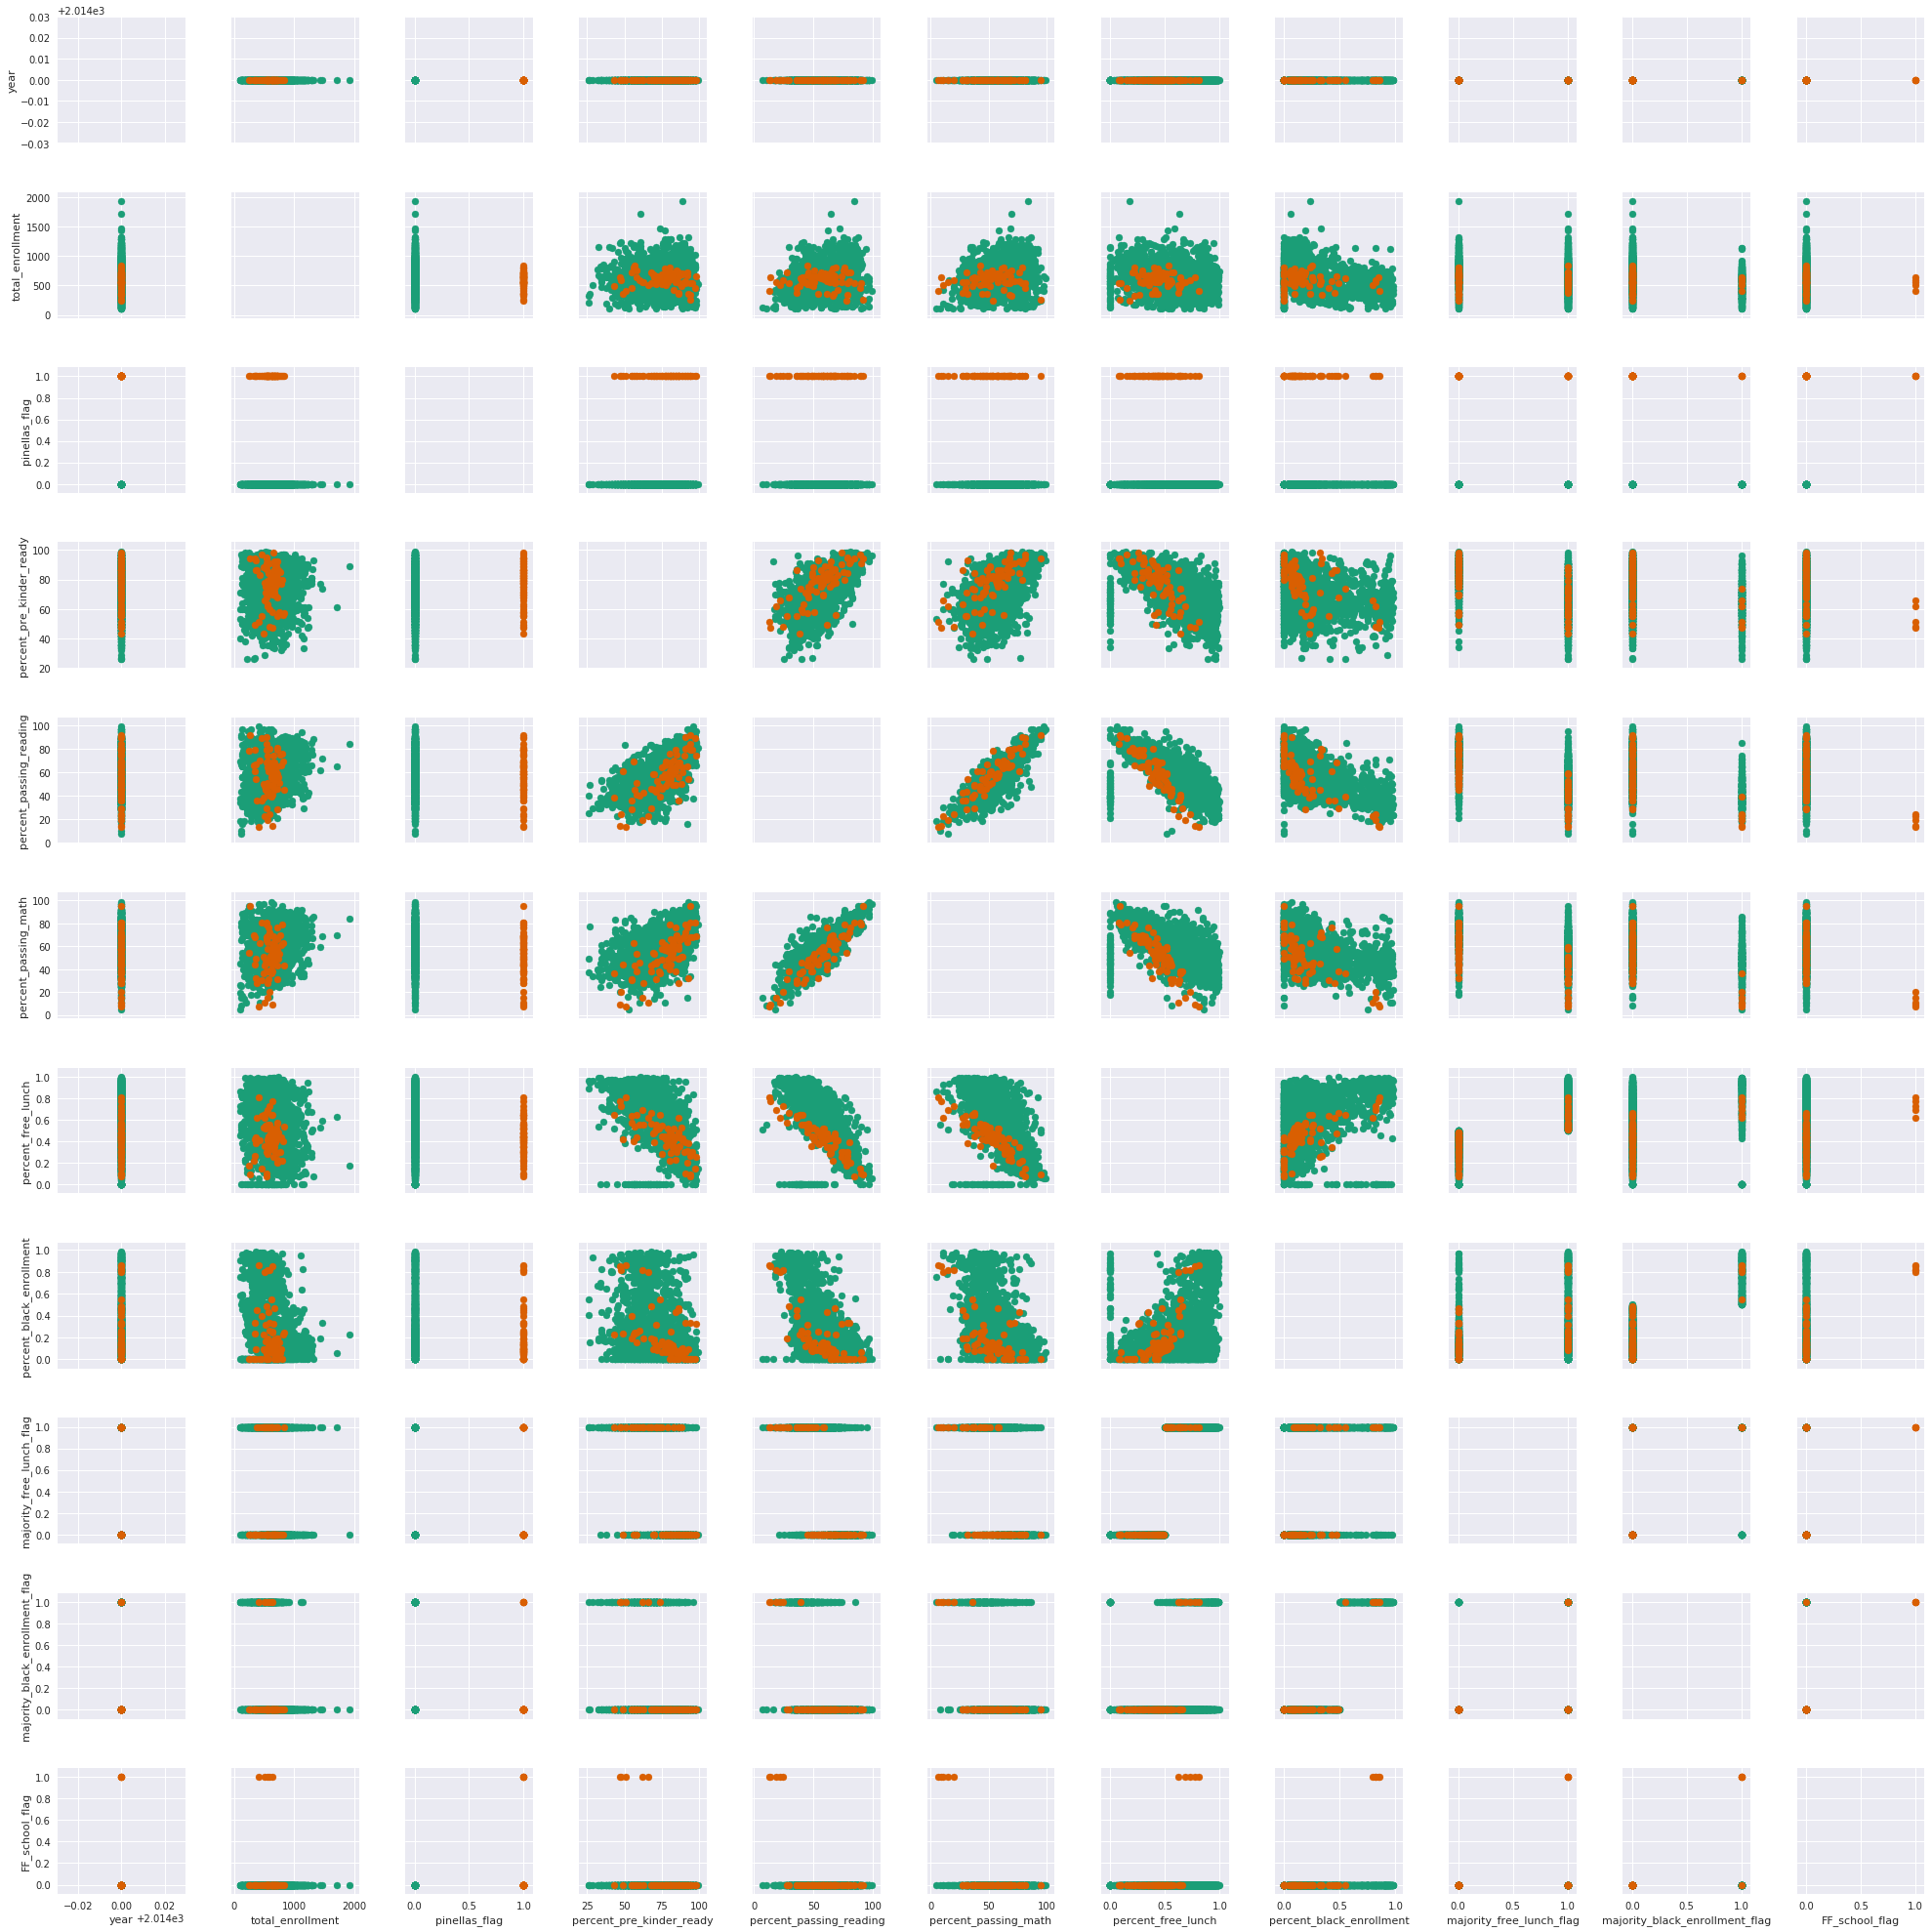

In [120]:
g = sns.PairGrid(schools,
                palette=race_palette,
                hue='pinellas_flag')
# g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

#(pairplot() works too )

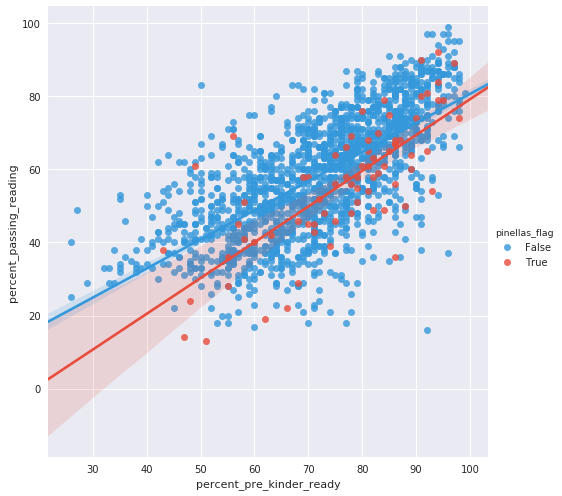

In [121]:
g = sns.lmplot(data=schools, x='percent_pre_kinder_ready', y='percent_passing_reading',
                  hue='pinellas_flag', 
                  palette=["#3498db", "#e74c3c"],
                  size=7)

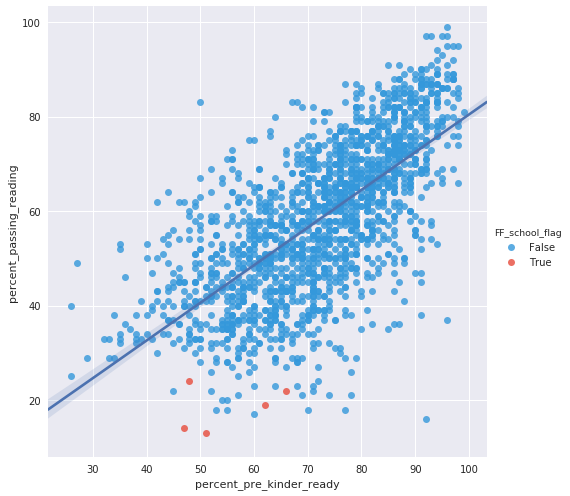

In [123]:
g = sns.lmplot(data=schools, x='percent_pre_kinder_ready', y='percent_passing_reading',
                    hue='FF_school_flag',
               palette=pinellas_palette,
                   fit_reg=False,
                  size=7)
sns.regplot(x="percent_pre_kinder_ready", y="percent_passing_reading", data=schools, scatter=False, ax=g.axes[0, 0])


In [ ]:
g = sns.lmplot(data=schools, x='percent_pre_kinder_ready', y='percent_passing_reading',
                    hue='FF_school_flag',
               palette=pinellas_palette,
                   fit_reg=False,
                  size=7)
g.savefig('', tran)


## Scatterplots show relationships
Let's look, for 


## Seaborn gives us facet grids!

## Pairplots show *many* relationships

## Facetgrids — what does breaking it out show us?

## Filter 

In [ ]:
##